In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **PCA**

In [ ]:
#Memuat dataset
df = pd.read_csv('cars_clus.csv')
print("Shape of dataset: ", df.shape)
df.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [ ]:
features = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
# Menggunakan variabel features sebagai fitur
X = df.loc[:, features].values
# Menggunakan class sebagai label
y = df.loc[:,['manufact']].values

# Standarisasi fitur
X = StandardScaler().fit_transform(X)

Kode tersebut digunakan untuk memilih kolom-kolom tertentu sebagai fitur dan mengonversinya menjadi array numpy. Kolom manufact digunakan sebagai label target. Fitur kemudian distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan deviasi standar 1.

In [ ]:
# fitur yang sebelumnya memiliki 8 dimensi diporyeksikan menggunakan PCA menjadi 2 dimensi
pca = PCA(n_components=2)

# Menghapus baris dengan missing values
df_clean = df.dropna(subset=features)

# Memisahkan fitur dan label lagi setelah pembersihan
X_clean = df_clean[features].values
y_clean = df_clean[['manufact']].values

# Melakukan standarasi pada data yang telah dibersihkan
X_clean = StandardScaler().fit_transform(X_clean)

# Menerapkan PCA / Mentransformasikan data x menjadi 2 komponen
principalComponents = pca.fit_transform(X_clean)

# Mentransformasikan data x menjadi 2 komponen
# Membuat DataFrame baru (principalDF) yang berisi 2 kolom
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['manufact']]], axis = 1)

Kode diatas berfungsi untuk membersihkan data dari nilai yang hilang, menstandarisasi fitur, dan mereduksi dimensi data dari 8 fitur menjadi 2 komponen utama menggunakan PCA, sehingga memudahkan visualisasi atau analisis berikutnya.

In [ ]:
print(df.groupby('manufact').size())

manufact
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
dtype: int64


<ipython-input-24-34ecbd0a2b38>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(manufacts))


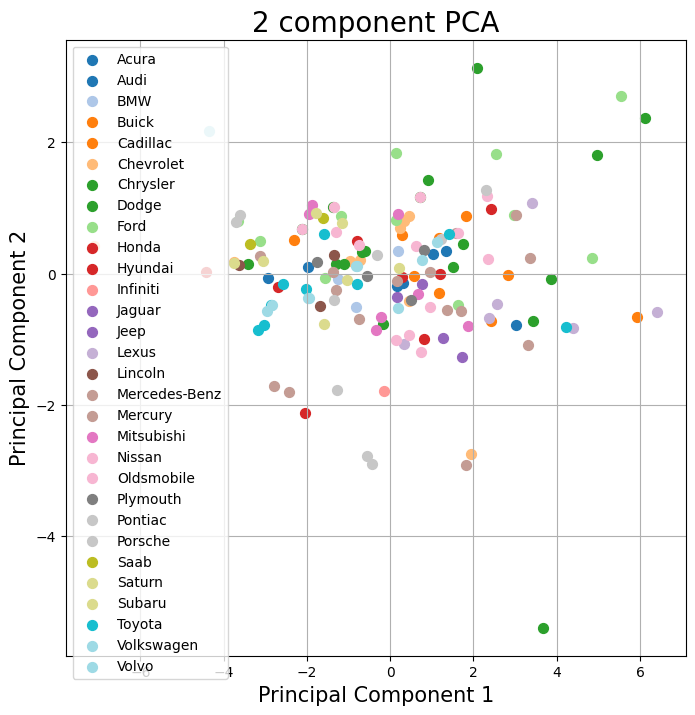

In [ ]:
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# List of manufacturers
manufacts = ['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
             'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus', 'Lincoln',
             'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
             'Pontiac', 'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']

# Menggunakan colormap untuk warna yang lebih banyak
colors = cm.get_cmap('tab20', len(manufacts))

for i, target in enumerate(manufacts):
    indicesToKeep = finalDf['manufact'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[colors(i)], s=50, label=target)

ax.legend()
ax.grid()

Selanjutnya dilakukan visualisasi 2D dari data yang telah diproyeksikan menggunakan PCA. Visualisasi ini bertujuan untuk menunjukkan distribusi data dalam dua dimensi, dengan warna yang mewakili merek kendaraan yang berbeda.

In [ ]:
pca.explained_variance_ratio_

array([0.67881592, 0.13709128])

Lalu kode diatas digunakan untuk melihat proporsi variansi yang dijelaskan oleh masing-masing komponen utama setelah penerapan PCA. Berdasarkan hasil, dua komponen utama berhasil menjelaskan sekitar 81.59% dari variansi total dalam data, dengan kata lain dua komponen ini sudah cukup baik dalam merangkum informasi penting dari data.

In [ ]:
columns_pca = ['Principal Component 1', 'Principal Component 2']
df_pca = pd.DataFrame(principalComponents, columns=columns_pca)
print(df_pca)

     Principal Component 1  Principal Component 2
0                -2.925132              -0.065336
1                 0.309413              -0.141019
2                 0.162172              -0.181129
3                 1.331647               0.345146
4                -1.972965               0.102700
..                     ...                    ...
150              -0.786443               0.121907
151               0.188356              -0.515184
152               0.762891               0.204185
153              -4.348089               2.177867
154               1.114651               0.477469

[155 rows x 2 columns]


Tujuannya adalah untuk memproyeksikan data asli yang memiliki banyak fitur ke dalam dua komponen utama menggunakan PCA. Hal ini bertujuan untuk mereduksi dimensi data agar lebih mudah dianalisis atau divisualisasikan dalam ruang 2D, sambil tetap mempertahankan sebagian besar informasi penting dari data asli.